<a href="https://colab.research.google.com/github/lorenafc/Capita_Selecta_RHI50403/blob/main/Multispectral_Land_Cover_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`WUR Machine Learning Course - Assignment 2 - Version 2024`

# Multispectral Land Cover Classification

Welcome to the second project of the MGI track of the course! In this exercise we will be performing a typical machine learning task for remote sensing: classifying land cover from Sentinel-2 images.

This notebook provides you with a starting baseline model. Your task will be to improve this model during a live Kaggle competition https://kaggle.com/competitions/wur-ml-mgi-2023. There is no code to be filled. You need to improve upon the (quite bad) baseline model provided in this notebook!

Please join the competition as a team with this link: https://www.kaggle.com/t/a5269f8ee6a14fd487e6e3489acb95d7

**Note, this exercise is about creativity. You are allowed to do everything that improves the final score**. In the submitted report, we will evaluate your effort, approach and creativity. **We will not evaluate your competition final score**. Also, **it is not a competition between teams**: we work together to get the best possible land cover map for Wageningen. Don't be secret about your discoveries and share information freely. If you run out of ideas, ask google/ChatGPT, other teams, or the teaching assistants (please in this order)

The evaluation metric is the class-average i.e., "macro" jaccard index, which is also known as intersection over union. It ensures that your final model predicts all land cover classes well.

## Lorena & Jan ($\leftarrow$ please replace)

Members:
* Ferreira Carpes, Lorena ($\leftarrow$ please replace)
* Jan Wolf ($\leftarrow$ please replace)

## Project Report

**Please submit a PDF report of your progress to Brightspace.** Note, the report can also be a PDF export of this notebook.

In the submission, please **answer the questions below** and **provide an experiment log** so that we can understand your process of improving your scores.

### Questions

Please answer the questions below. They are also meant to give some ideas towards directions to explore that may improve the final score. Note, you can/should use Google (and ChatGPT) to give you some ideas and strategies. But please don't copy paste generic GPT answers to the questions below (it is a waste of everyone's time).

**Question 1:** What performance gain did you see when improving the data, e.g., through feature engineering versus improving the classifier, e.g., though better hyperparameter tuning, or another classifier? Please reply briefly.

**Answer 1:**

- we first tuned the hyperparameter by increasing the amout of trees in the clf. The increase from 3 to 10 increased the result a bit, while the switch to 50 decreased it again a lot.

- than we added more data to the moddel by calculating the NDVI and using all bands. This also improved the result

- after that we changed the model to randomforest classifier and also the test/training data (in the beginning we splitted arnhem and also renkum into test and training data, in the end we used arnhem as train and renkum as test data) : this gave us another big improvement.

- we also tryied smoothing the results in post classification steps with gaussian smoothing. This kept the results more less at the same accuracy

- finally we also tried feature importance and only selected the most important ones, but this decreased our result.

- Overall improving the data, improving the classifier and testing other classifier increased the performance. The biggest improvement was made by changing the model to random forest classifier


**Question 2:** How can you automate or streamline the hyperparameter tuning process? Did you implement a cross-validation strategy? Which effect did it have on your output?

**Answer 2:**

- To automate or streamline the hyperparameter tuning process you could use GridSearch, Baysian opimazation or hypermeterimportance anlysis
- we used the gridsearchCV to calculate the best looking settings of parameters
- this increased the result quality slightly

**Question 3:** How can you improve the data through feature engineering? What spectral features can you implement? Can you think of (or google) textural features/patterns that may help?

**Answer 3:**

- Ways to improve the data through feature enginieering are feature scaling, diminsionallity reduction, adding more data or calculating indices.
- Spectral features that we can implement: add more (detailed) bands, calculate Indices
- we implemented NDVI as in indice to make a better seperation between the classes. Especially in the forest area, there was first a lot forest classified as water, what has been fixed with this.
- textural features/paterns that may help to improve the data/classification result are object-based feature extracting or edge detection. Object-based classification extract information from image objects rather than individual pixels. These features can capture contextual information and improve classification accuracy.Edge detection algorithms identify abrupt changes in pixel values, which often correspond to boundaries between different land cover classes.

**Question 4:** Why is the Jaccard score (i.e., Intersection over Union) in Renkum lower than in Arnhem?

**Answer 4:**
- the lower Jaccard score of Renkum indictates a poorer overlap/agreement between the predicted labels and the groud truth labels. This might be because the model is trained/optimized on arnhem and only tested on renkum which result in a lover agreement on the predicted labels and the groudn truth labels.

### Experiment Log

**!!! Please summarize the final strategy in one paragraph.!!!**

Please fill the experiment log below with details on what you tried during your submissions.

| Version/Submission ID | submission macro Jaccard | Note                  |
|-----------------------|--------------------------|-----------------------|
| v0                    | 0.15986                  | baseline DT, RGB data |
| v1.0                  | didnt submitted          | added more trees (10) |
| v1.1                  | didnt submitted          | added more trees (50) |
| v1.2                  | /                        | find optimal trees(10)|
| v2.0                  | 0.3826                   | adding more bands/NDVI|
| v3.0                  | /                        | First try CNN         |
| v3.1                  | /                        | Second try CNN        |
| v4.0                  | 0.4383                   | Random Forest         |
| v5.0                  | 0.4383                   | Gaussian smoothing    |
| v6.0                  | 043074                   | Feature importance    |

If necessary, you can provide here additional information to the individual submissions:
e.g.,
* v0 just submitted the baseline code
* v1.0 DecisionTreeClassifier with 10 : didnt submitted because result still didnt looked that good
* v1.1 DecisionTreeClassifier with 50 trees: didnt submitted because result still didnt looked that good
* v1.2 Trying to find the optimal amount of trees (result: n = 10)
* v2.0 Adding more data (all bands + NDVI)
* v3.0 Trying to implement a CNN with the help Internet (didnt run)
* v3.1 Trying to implement a CNN with the help of ChatGPT (didnt run)
* v4.0 Implementing Random Forest classification  
* v5.0 Trying to improve the result through post classification processing:  we used gaussian smoothing
* v6.0 Implementing feature importance to improve the classification result of the previous random forest classifier

# Land Cover Data in this Exercise

We provide you with a Sentinel-2 images from May 18th, 2017 with 12 spectral bands and a land cover image from the [S2GLC land cover map](https://s2glc.cbk.waw.pl/).

Your task will be to train a classifier on data from Arnhem and Renkum to predict land cover of Wageningen as accurately as possible

In [ ]:
!pip install rasterio

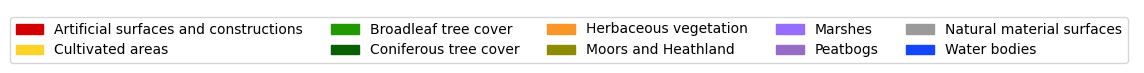

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import pandas as pd

bands = [
    "B1",  # idx 0: Coastal aerosol
    "B2",  # idx 1: Blue
    "B3",  # idx 2: Green
    "B4",  # idx 3: Red
    "B5",  # idx 4: Red edge 1
    "B6",  # idx 5: Red edge 2
    "B7",  # idx 6: Red edge 3
    "B8",  # idx 7: NIR (Near-Infrared)
    "B8A", # idx 8: Red edge 4
    "B10", # idx 9: Haze Clouds
    "B11", # idx 10: SWIR 1
    "B12", # idx 11: SWIR 2
]

color_map_entries = {
    58: {"id":0, "color": "#D20000", "name": "Artificial surfaces and constructions"},
    68: {"id":1, "color": "#FDD327", "name": "Cultivated areas"},
    76: {"id":2, "color": "#239800", "name": "Broadleaf tree cover"},
    77: {"id":3, "color": "#085E00", "name": "Coniferous tree cover"},
    95: {"id":4, "color": "#F99627", "name": "Herbaceous vegetation"},
    96: {"id":5, "color": "#8D8B00", "name": "Moors and Heathland"},
    98: {"id":6, "color": "#956DFF", "name": "Marshes"},
    99: {"id":7, "color": "#956DC4", "name": "Peatbogs"},
    113:{"id":8, "color": "#9A9A9A", "name": "Natural material surfaces"},
    151:{"id":9, "color": "#1445F9", "name": "Water bodies"},
}

hex_colors = [v["color"] for v in color_map_entries.values()]
s2glc_cmap = ListedColormap(hex_colors)

def plot_legend():
    # plot the colors with names of the color map
    hex_colors = [v["color"] for v in color_map_entries.values()]
    color_names = [v["name"] for v in color_map_entries.values()]
    legend_elements = [Patch(color=color, label=name) for color, name in zip(hex_colors, color_names)]
    plt.figure(figsize=(.1,.1))
    plt.legend(handles=legend_elements, ncols=5, loc='upper right')
    plt.axis('off')
plot_legend()



## Training - Arnhem

We provide you with a Sentinel-2 image and Land Cover data in a 500 px by 500 px image of West Arnhem/Osterbeek. It is roughly located [here](https://www.google.com/maps/place/Oosterbeek,+Netherlands/@51.9859384,5.6892065,12z/data=!3m1!4b1!4m15!1m8!3m7!1s0x47c7ba91ce9b2273:0x161c5ae0f973cad7!2sArnhem,+Netherlands!3b1!8m2!3d51.9851034!4d5.8987296!16zL20vMGZsc2Y!3m5!1s0x47c7af4cc39b8bb5:0x929708220947321!8m2!3d51.9858013!4d5.8462813!16s%2Fm%2F025rq13?entry=ttu) in Google Maps.

You can use this image to fit/train your model.

In [ ]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: /content


**---------------------------------------------------------------------------**

**IDEA:**
- we could add more bands for a better classification resutl, e.g. calculate NDVI

**--------------------------------------------------------------------------**

Text(0.5, 1.0, 'S2-GLC Arnhem')

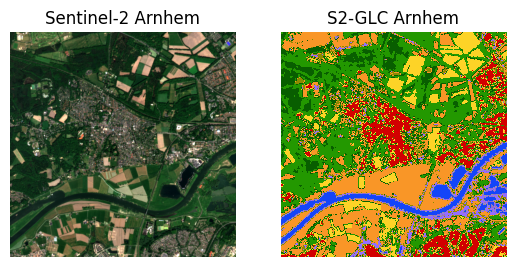

In [ ]:

with rasterio.open("s2_arn.tif") as src:
    s2_arn = src.read()

    # select only RGB bands
    rgb_band_idxs = np.array([bands.index("B4"), bands.index("B3"), bands.index("B2")])
    s2_arn = s2_arn[rgb_band_idxs]

with rasterio.open("lc_arn.tif") as src:
    lc_arn = src.read(1)

fig, axs = plt.subplots(1,2)

ax = axs[0]
# transpose moves channel dimension last and / 2k scales brightness
ax.imshow(s2_arn.transpose(1,2,0) / 2000)
ax.axis("off")
ax.set_title("Sentinel-2 Arnhem")

ax = axs[1]
ax.imshow(lc_arn, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("S2-GLC Arnhem")

## Validation - Renkum

We provide you with a Sentinel-2 image and Land Cover data in a 500 px by 500 px image of Renkum. It is roughly located [here](https://www.google.com/maps/place/Renkum,+Netherlands/@51.977996,5.7196171,4067m/data=!3m1!1e3!4m15!1m8!3m7!1s0x47c7ba91ce9b2273:0x161c5ae0f973cad7!2sArnhem,+Netherlands!3b1!8m2!3d51.9851034!4d5.8987296!16zL20vMGZsc2Y!3m5!1s0x47c7ac09339be3a7:0xdb9fb67545e825e!8m2!3d51.9834947!4d5.7420527!16s%2Fg%2F1yg58lpv7?entry=ttu) in Google Maps.

You can use this image to choose your hyperparameter.

Text(0.5, 1.0, 'S2-GLC Renkum')

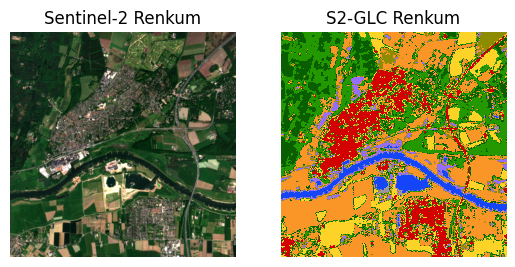

In [ ]:


with rasterio.open("s2_ren.tif") as src:
    s2_ren = src.read()

    # select only RGB bands
    rgb_band_idxs = np.array([bands.index("B4"), bands.index("B3"), bands.index("B2")])
    s2_ren = s2_ren[rgb_band_idxs]

with rasterio.open("lc_ren.tif") as src:
    lc_ren = src.read(1)

fig, axs = plt.subplots(1,2)

ax = axs[0]
# transpose moves channel dimension last and / 2k scales brightness
ax.imshow(s2_ren.transpose(1,2,0) / 2000)
ax.axis("off")
ax.set_title("Sentinel-2 Renkum")

ax = axs[1]
ax.imshow(lc_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("S2-GLC Renkum")

## Test - Wageningen

We do not provide you with land cover ground truth of Wageningen. Please predict this image with your classifier, you can visually evaluate your produced land cover map.

Submit your predictions to the Kaggle server for evaluation.

Text(0.5, 1.0, 'Sentinel-2 Wageningen')

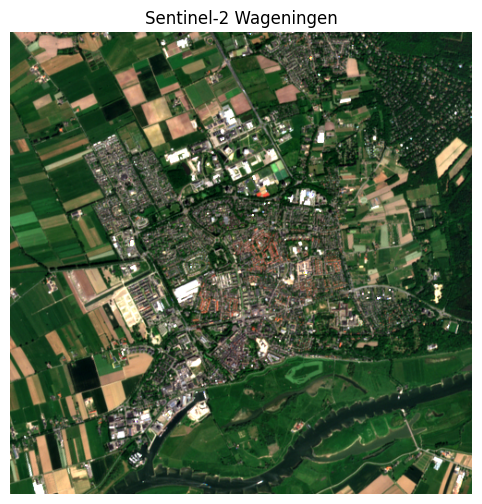

In [ ]:


with rasterio.open("s2_wur.tif") as src:
    s2_wur = src.read()

    # select only RGB bands
    rgb_band_idxs = np.array([bands.index("B4"), bands.index("B3"), bands.index("B2")])
    s2_wur = s2_wur[rgb_band_idxs]

# with rasterio.open("lc_wur.tif") as src:
#    lc_wur = src.read(1)

fig, ax = plt.subplots(1,1, figsize=(10,6))

# transpose moves channel dimension last and / 2k scales brightness
ax.imshow(s2_wur.transpose(1,2,0) / 2000)
ax.axis("off")
ax.set_title("Sentinel-2 Wageningen")


## Data Overview

Here, we provide an overview over the images and land cover ground truth. Your task is to produce a land cover map for wageningen, which as as accurate as possible measured by the macro Intersection over Union score.

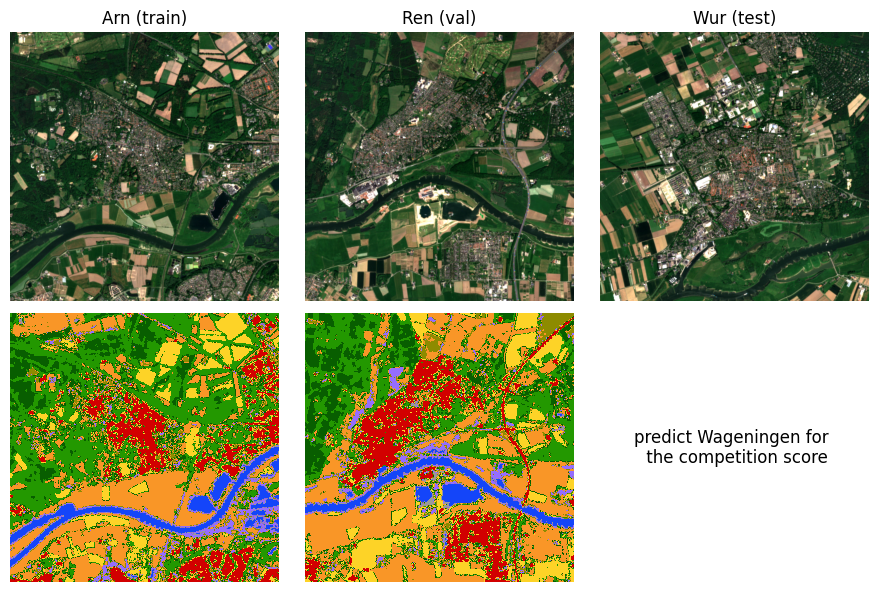

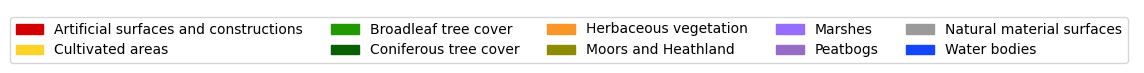

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(9,6))
axs = axs.reshape(-1)

# first row
axs[0].imshow(np.clip(s2_arn.transpose(1,2,0) / 2000,0,1))
axs[1].imshow(np.clip(s2_ren.transpose(1,2,0) / 2000,0,1))
axs[2].imshow(np.clip(s2_wur.transpose(1,2,0) / 2000,0,1))

# second row
axs[3].imshow(lc_arn, cmap=s2glc_cmap)
axs[4].imshow(lc_ren, cmap=s2glc_cmap)
axs[5].text(0.5,0.5, "predict Wageningen for \n the competition score", ha="center", va="center", fontsize=12)

# titles
axs[0].set_title("Arn (train)")
axs[1].set_title("Ren (val)")
axs[2].set_title("Wur (test)")

# remove boxes around plots
for ax in axs:
    ax.axis("off")

# add land cover legend and make plots a bit tighter
plt.tight_layout()
plot_legend()

# Classification Model

We provide a baseline model here. Please improve this model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score, classification_report, confusion_matrix

# reshape the image C x 500 x 500 to a vector C x 250000
C, H, W = s2_arn.shape
X = s2_arn.reshape(C, H * W).T

# reshape the ground truth 500 x 500 to a vector 1 x 250000
y = lc_arn.reshape(-1,1)

# define the decision tree classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf = DecisionTreeClassifier(max_depth=3)

# split Arnhem data pixel-wise randomly in train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# fit the classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

predict on randomly split test data

In [ ]:
# predict the test data
y_pred = clf.predict(X_test)

labels = [v["id"] for v in color_map_entries.values()]
target_names = [v["name"] for v in color_map_entries.values()]
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names, zero_division=0))

                                       precision    recall  f1-score   support

Artificial surfaces and constructions       0.40      0.63      0.49      5475
                     Cultivated areas       0.69      0.50      0.58      4880
                 Broadleaf tree cover       0.58      0.74      0.65     13949
                Coniferous tree cover       0.36      0.29      0.32      5101
                Herbaceous vegetation       0.48      0.67      0.56     11285
                  Moors and Heathland       0.00      0.00      0.00      1614
                              Marshes       0.00      0.00      0.00      4444
                             Peatbogs       0.00      0.00      0.00       453
            Natural material surfaces       0.00      0.00      0.00       113
                         Water bodies       0.00      0.00      0.00      2686

                             accuracy                           0.51     50000
                            macro avg       0.25  

Jaccard score: 0.18


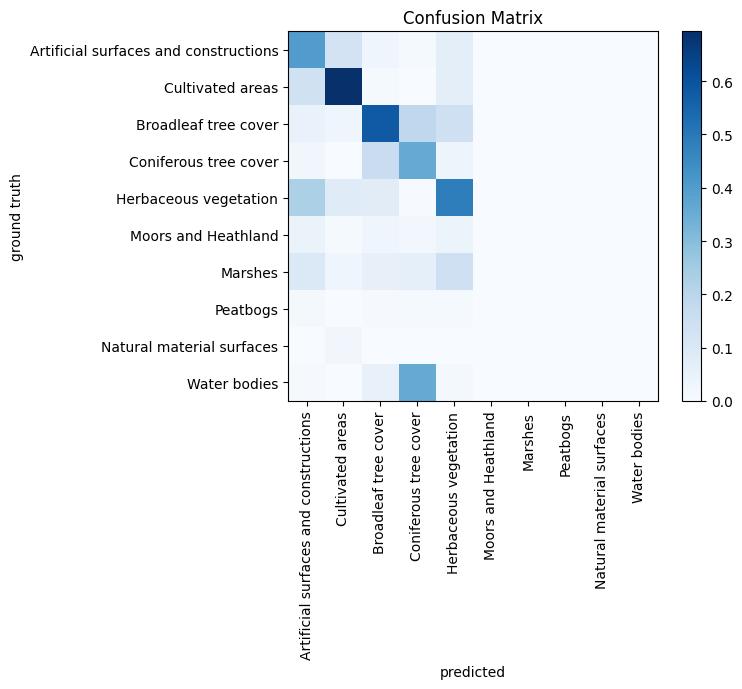

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels, normalize="pred")

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_xticks(labels)
ax.set_xticklabels(target_names, rotation=90)
ax.set_yticks(labels)
ax.set_yticklabels(target_names)

ax.set_title('Confusion Matrix')
ax.set_xlabel("predicted")
ax.set_ylabel("ground truth")
plt.colorbar(im)

# class-wise f1-score
score = jaccard_score(y_test, y_pred, average="macro", labels=labels)

print(f"Jaccard score: {score:.2f}")

### Predict on Renkum


Jaccard score: 0.17


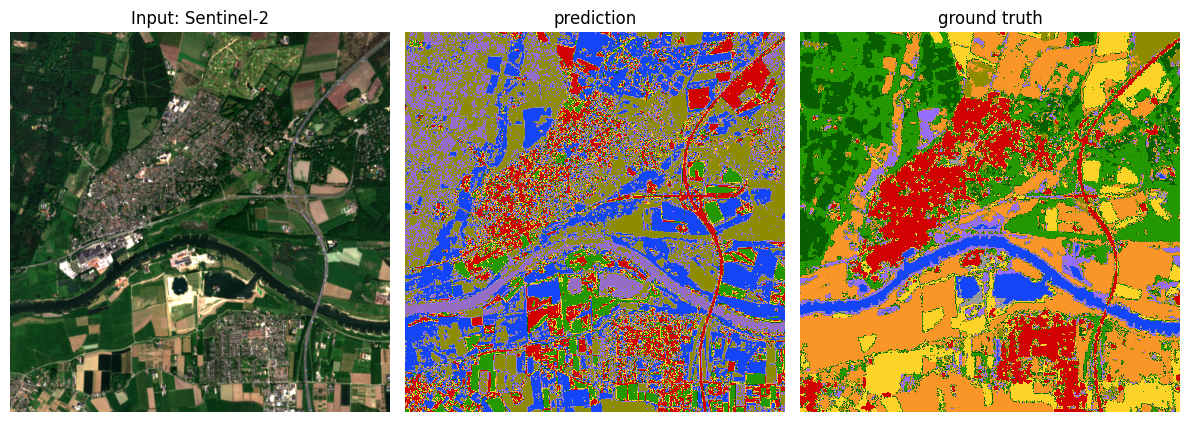

In [ ]:
C, H, W = s2_ren.shape
X_ren = s2_ren.reshape(C, H * W).T
y_ren = lc_ren.reshape(H * W)

y_pred_ren = clf.predict(X_ren)
y_pred_ren = y_pred_ren.reshape(H, W) # reshape labels back from vector to an image

fig, axs = plt.subplots(1,3, figsize=(12,12))
ax = axs[0]
ax.imshow(s2_ren.transpose(1,2,0) / 2000)
ax.axis("off")
ax.set_title("Input: Sentinel-2")

ax = axs[1]
ax.imshow(y_pred_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("prediction")

ax = axs[2]
ax.imshow(lc_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("ground truth")
plt.tight_layout()

# class-wise IoU (same Jaccard Score)
score = jaccard_score(lc_ren.reshape(-1), y_pred_ren.reshape(-1), average="macro", labels=labels)

print(f"Jaccard score: {score:.2f}")

## Evaluate on Wageningen

Text(0.5, 1.0, 'prediction')

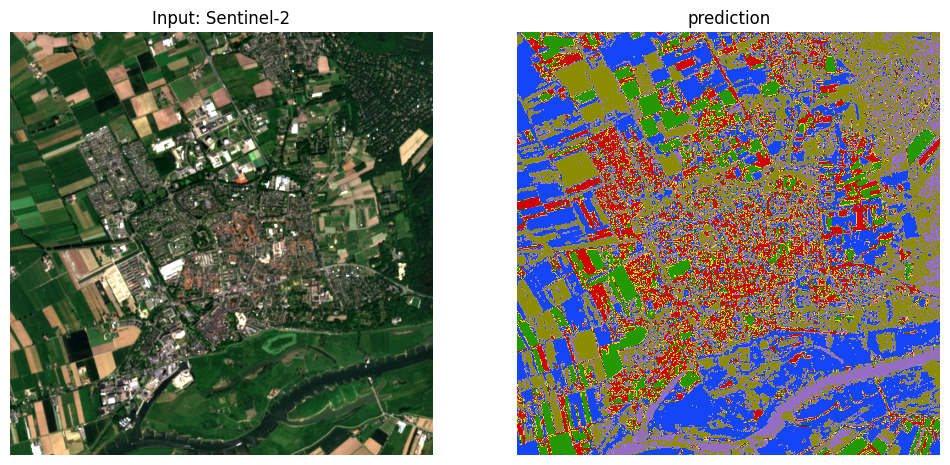

In [ ]:
C, H, W = s2_wur.shape
X_wur = s2_wur.reshape(C, H * W).T
# y_wur = lc_wur.reshape(H * W)

y_pred_wur = clf.predict(X_wur)
y_pred_wur = y_pred_wur.reshape(H, W)

fig, axs = plt.subplots(1,2, figsize=(12,12))
ax = axs[0]
ax.imshow(s2_wur.transpose(1,2,0) / 2000)
ax.axis("off")
ax.set_title("Input: Sentinel-2")

ax = axs[1]
ax.imshow(y_pred_wur, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("prediction")

In [ ]:
submission_df = pd.DataFrame([y_pred_wur.reshape(-1)], index=["Predicted"]).T
submission_df.index.name = 'ID'
submission_df.to_csv("submission.csv")
print("writing submission")



writing submission


                                       precision    recall  f1-score   support

Artificial surfaces and constructions       0.53      0.79      0.63      5295
                     Cultivated areas       0.76      0.60      0.67      4814
                 Broadleaf tree cover       0.67      0.72      0.69     14019
                Coniferous tree cover       0.50      0.39      0.44      5254
                Herbaceous vegetation       0.61      0.79      0.69     11371
                  Moors and Heathland       0.31      0.06      0.10      1667
                              Marshes       0.25      0.06      0.10      4454
                             Peatbogs       0.33      0.00      0.00       425
            Natural material surfaces       0.67      0.23      0.34       133
                         Water bodies       0.67      0.75      0.71      2568

                             accuracy                           0.61     50000
                            macro avg       0.53  

Jaccard score: 0.28


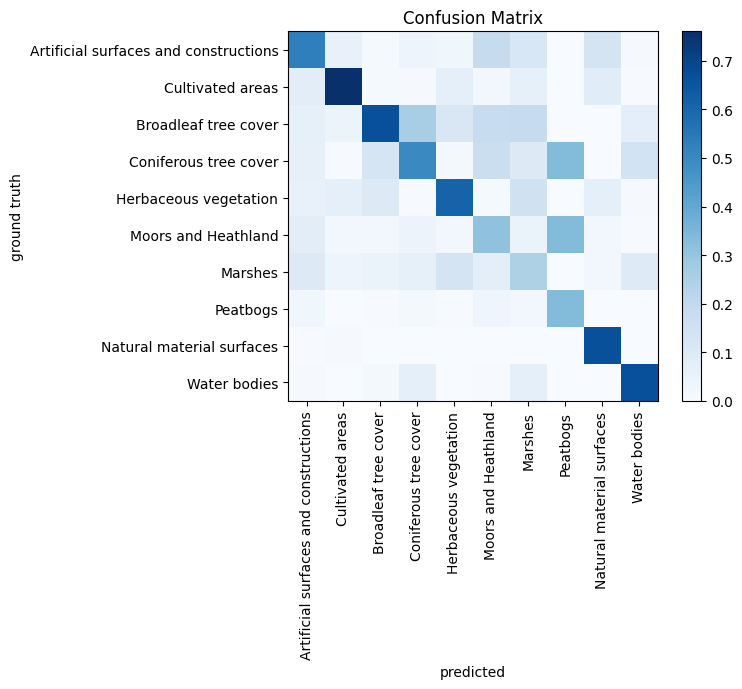

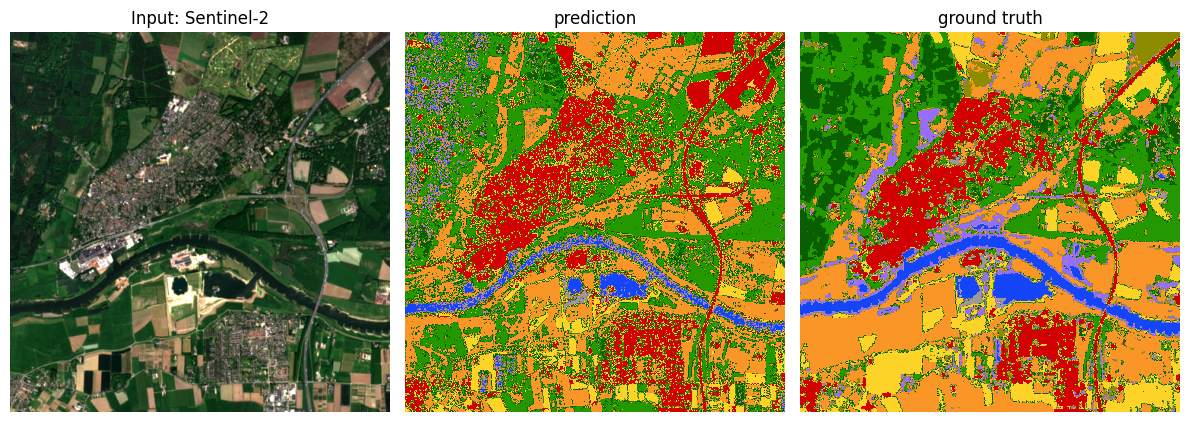

In [ ]:
# Version 1.0 DecisionTreeClassifier with 10 trees

# Imporved version of the given code to deeper decision Trees = 10
# after checking the optimal amount of trees later in the script we found out that 10 is the best

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score, classification_report, confusion_matrix

# reshape the image C x 500 x 500 to a vector C x 250000
C, H, W = s2_arn.shape
X = s2_arn.reshape(C, H * W).T

# reshape the ground truth 500 x 500 to a vector 1 x 250000
y = lc_arn.reshape(-1,1)

# define the decision tree classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf10 = DecisionTreeClassifier(max_depth=10)

# split Arnhem data pixel-wise randomly in train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# fit the classifier
clf10.fit(X_train,y_train)

# predict the test data
y_pred = clf10.predict(X_test)

labels = [v["id"] for v in color_map_entries.values()]
target_names = [v["name"] for v in color_map_entries.values()]
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names, zero_division=0))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels, normalize="pred")

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_xticks(labels)
ax.set_xticklabels(target_names, rotation=90)
ax.set_yticks(labels)
ax.set_yticklabels(target_names)

ax.set_title('Confusion Matrix')
ax.set_xlabel("predicted")
ax.set_ylabel("ground truth")
plt.colorbar(im)

# class-wise f1-score
score = jaccard_score(y_test, y_pred, average="macro", labels=labels)

print(f"Jaccard score: {score:.2f}")

# Predict on Renkum
C, H, W = s2_ren.shape
X_ren = s2_ren.reshape(C, H * W).T
y_ren = lc_ren.reshape(H * W)

y_pred_ren = clf10.predict(X_ren)
y_pred_ren = y_pred_ren.reshape(H, W) # reshape labels back from vector to an image

fig, axs = plt.subplots(1,3, figsize=(12,12))
ax = axs[0]
ax.imshow(s2_ren.transpose(1,2,0) / 2000)
ax.axis("off")
ax.set_title("Input: Sentinel-2")

ax = axs[1]
ax.imshow(y_pred_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("prediction")

ax = axs[2]
ax.imshow(lc_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("ground truth")
plt.tight_layout()

# class-wise IoU (same Jaccard Score)
score = jaccard_score(lc_ren.reshape(-1), y_pred_ren.reshape(-1), average="macro", labels=labels)

print(f"Jaccard score: {score:.2f}")

**------------------------------Notes-------------------------------------**

Increasing the amount of trees from 3 to 10 does change the output predicton on Renkum abit. The result looks more accurate. Next we try to even increase the number of trees further one more time.

                                       precision    recall  f1-score   support

Artificial surfaces and constructions       0.51      0.51      0.51      5396
                     Cultivated areas       0.56      0.56      0.56      4924
                 Broadleaf tree cover       0.58      0.57      0.58     13986
                Coniferous tree cover       0.33      0.34      0.33      4960
                Herbaceous vegetation       0.57      0.56      0.57     11297
                  Moors and Heathland       0.12      0.12      0.12      1718
                              Marshes       0.15      0.16      0.15      4531
                             Peatbogs       0.03      0.04      0.03       407
            Natural material surfaces       0.32      0.28      0.30       118
                         Water bodies       0.62      0.62      0.62      2663

                             accuracy                           0.48     50000
                            macro avg       0.38  

Jaccard score: 0.22


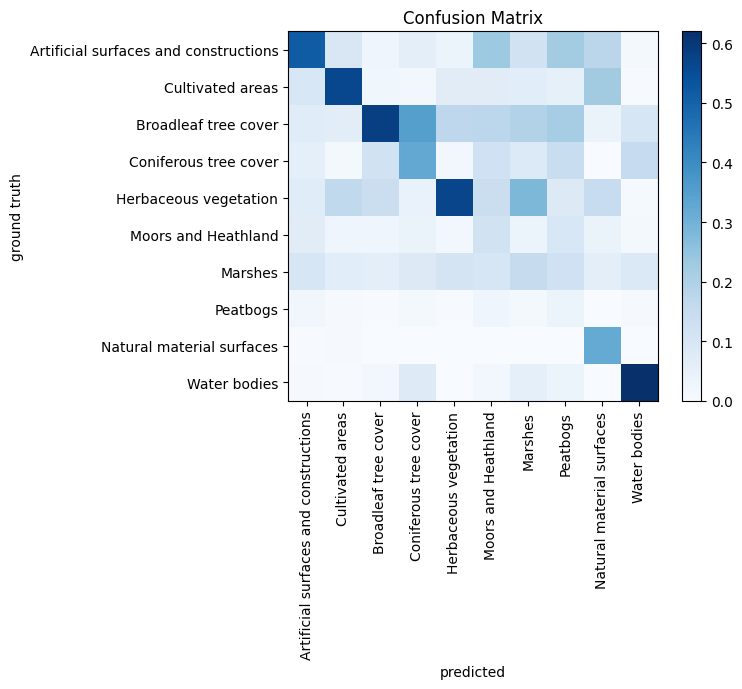

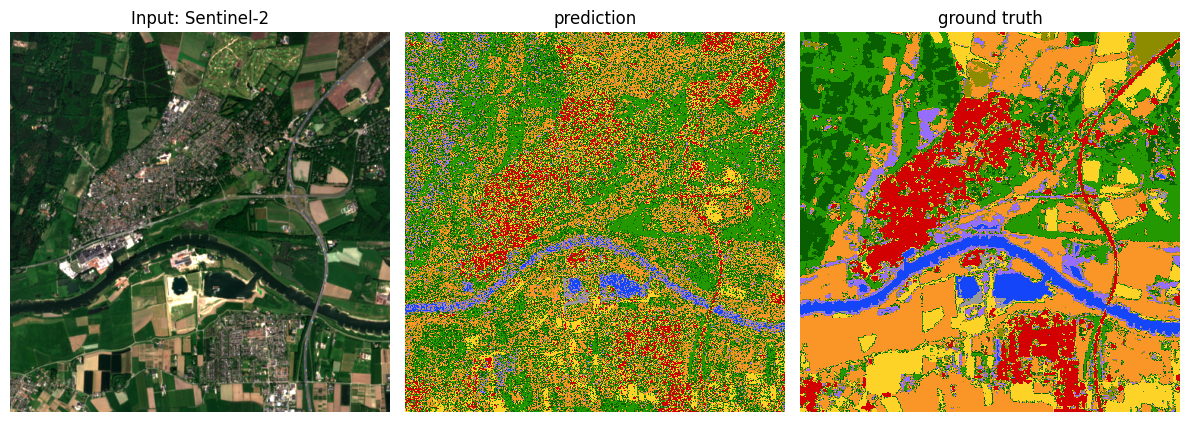

In [ ]:
# Version 1.1 DecisionTreeClassifier with 50 trees

# Imporved version of the given code to deeper decision Trees one more time (50)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score, classification_report, confusion_matrix

# reshape the image C x 500 x 500 to a vector C x 250000
C, H, W = s2_arn.shape
X = s2_arn.reshape(C, H * W).T

# reshape the ground truth 500 x 500 to a vector 1 x 250000
y = lc_arn.reshape(-1,1)

# define the decision tree classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf50 = DecisionTreeClassifier(max_depth=50)

# split Arnhem data pixel-wise randomly in train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# fit the classifier
clf50.fit(X_train,y_train)

# predict the test data
y_pred = clf50.predict(X_test)

labels = [v["id"] for v in color_map_entries.values()]
target_names = [v["name"] for v in color_map_entries.values()]
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names, zero_division=0))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels, normalize="pred")

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_xticks(labels)
ax.set_xticklabels(target_names, rotation=90)
ax.set_yticks(labels)
ax.set_yticklabels(target_names)

ax.set_title('Confusion Matrix')
ax.set_xlabel("predicted")
ax.set_ylabel("ground truth")
plt.colorbar(im)

# class-wise f1-score
score = jaccard_score(y_test, y_pred, average="macro", labels=labels)

print(f"Jaccard score: {score:.2f}")

# Predict on Renkum
C, H, W = s2_ren.shape
X_ren = s2_ren.reshape(C, H * W).T
y_ren = lc_ren.reshape(H * W)

y_pred_ren = clf50.predict(X_ren)
y_pred_ren = y_pred_ren.reshape(H, W) # reshape labels back from vector to an image

fig, axs = plt.subplots(1,3, figsize=(12,12))
ax = axs[0]
ax.imshow(s2_ren.transpose(1,2,0) / 2000)
ax.axis("off")
ax.set_title("Input: Sentinel-2")

ax = axs[1]
ax.imshow(y_pred_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("prediction")

ax = axs[2]
ax.imshow(lc_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("ground truth")
plt.tight_layout()

# class-wise IoU (same Jaccard Score)
score = jaccard_score(lc_ren.reshape(-1), y_pred_ren.reshape(-1), average="macro", labels=labels)

print(f"Jaccard score: {score:.2f}")

------------------------------Notes-------------------------------------

Increasing the amount of trees from 10 to 50 does change the output predicton on Renkum alot. But the out put looks worse
- so we will next try to find the optimal amount of trees

In [ ]:
# Version 1.2 Trying to find the optimal amount of trees
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

param_grid = {
    'max_depth': range(1, 51)
}

# Initialize GridSearchCV
# The result of this GridSearchCV was 10 trees)
# grid_search = GridSearchCV(clf50, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
# grid_search.fit(X, y)

# Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best parameters:", best_params)
#print("Best score:", best_score)

                                       precision    recall  f1-score   support

Artificial surfaces and constructions       0.70      0.86      0.77      5441
                     Cultivated areas       0.69      0.69      0.69      4921
                 Broadleaf tree cover       0.78      0.80      0.79     14036
                Coniferous tree cover       0.71      0.67      0.69      5149
                Herbaceous vegetation       0.79      0.88      0.83     11203
                  Moors and Heathland       0.38      0.18      0.25      1593
                              Marshes       0.50      0.35      0.41      4536
                             Peatbogs       0.00      0.00      0.00       416
            Natural material surfaces       0.60      0.34      0.44       102
                         Water bodies       0.93      0.93      0.93      2603

                             accuracy                           0.74     50000
                            macro avg       0.61  

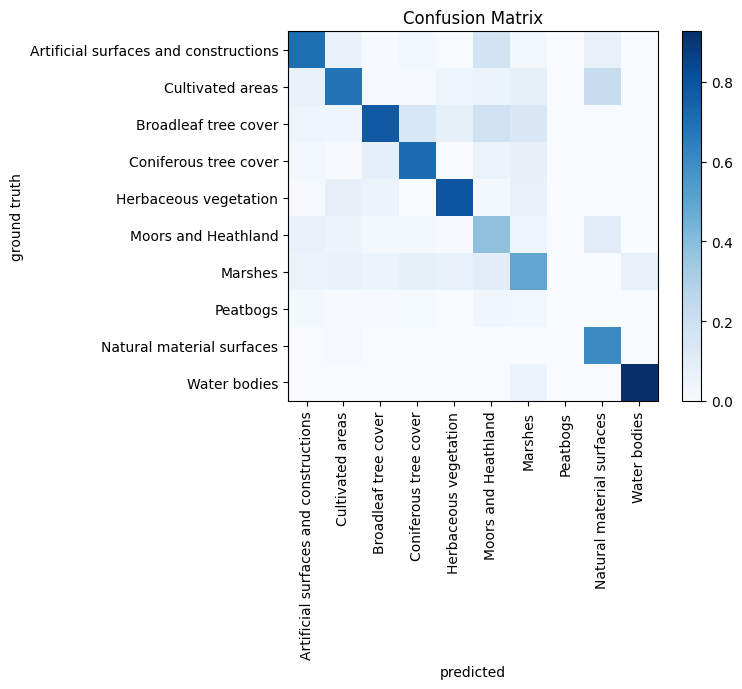

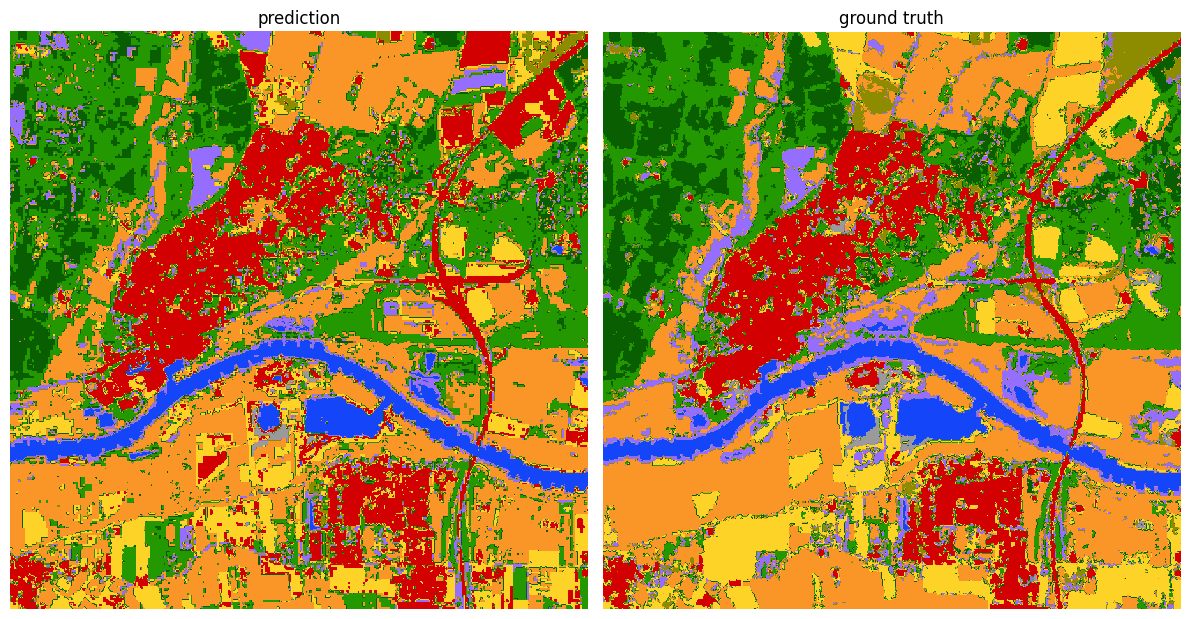

In [ ]:
# Version 2.0 Adding more data (all bands + NDVI)
# To improve the result we now try to add more data. We could either add more bands or adding helpful idices
# So now we will caclate the NDVI and add it to the model

import numpy as np

# bands = [
#    "B1",  # idx 0: Coastal aerosol
#    "B2",  # idx 1: Blue
#    "B3",  # idx 2: Green
#    "B4",  # idx 3: Red
#    "B5",  # idx 4: Red edge 1
#    "B6",  # idx 5: Red edge 2
#    "B7",  # idx 6: Red edge 3
#    "B8",  # idx 7: NIR (Near-Infrared)
#    "B8A", # idx 8: Red edge 4
#    "B10", # idx 9: Haze Clouds
#    "B11", # idx 10: SWIR 1
#]

# first we need to reload the file, because at the beginning it gets mask to only RGB

########################################### Arnhem  ##################################################################
with rasterio.open("s2_arn.tif") as src:
    s2_arn = src.read()

arn_red = s2_arn[4]
arn_NIR = s2_arn[7]

# Avoiding zero division errors by setting numpy warnings to ignore
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
arn_ndvi =  (arn_NIR - arn_red) / (arn_NIR + arn_red)

# Reshape ndvi to match the dimensions of s2_arn
arn_ndvi_reshaped = np.expand_dims(arn_ndvi, axis=0)

s2_arn = np.concatenate((s2_arn, arn_ndvi_reshaped))
########################################### Renkum  ##################################################################
with rasterio.open("s2_ren.tif") as src:
    s2_ren = src.read()

ren_red = s2_ren[4]
ren_NIR = s2_ren[7]

# Avoiding zero division errors by setting numpy warnings to ignore
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ren_ndvi =  (ren_NIR - ren_red) / (ren_NIR + ren_red)

# Reshape ndvi to match the dimensions of s2_ren
ren_ndvi_reshaped = np.expand_dims(ren_ndvi, axis=0)


s2_ren = np.concatenate((s2_ren, ren_ndvi_reshaped))

############################################################################################################
# now apply the model

# reshape the image C x 500 x 500 to a vector C x 250000
C, H, W = s2_arn.shape
X = s2_arn.reshape(C, H * W).T

# reshape the ground truth 500 x 500 to a vector 1 x 250000
y = lc_arn.reshape(-1,1)

# define the decision tree classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf = DecisionTreeClassifier(max_depth=8)

# split Arnhem data pixel-wise randomly in train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# fit the classifier
clf.fit(X_train,y_train)

# predict the test data
y_pred = clf.predict(X_test)

labels = [v["id"] for v in color_map_entries.values()]
target_names = [v["name"] for v in color_map_entries.values()]
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names, zero_division=0))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels, normalize="pred")

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_xticks(labels)
ax.set_xticklabels(target_names, rotation=90)
ax.set_yticks(labels)
ax.set_yticklabels(target_names)

ax.set_title('Confusion Matrix')
ax.set_xlabel("predicted")
ax.set_ylabel("ground truth")
plt.colorbar(im)

# class-wise f1-score
score = jaccard_score(y_test, y_pred, average="macro", labels=labels)

print(f"Jaccard score: {score:.2f}")

# Predict on Renkum
C, H, W = s2_ren.shape
X_ren = s2_ren.reshape(C, H * W).T
y_ren = lc_ren.reshape(H * W)

y_pred_ren = clf.predict(X_ren)
y_pred_ren = y_pred_ren.reshape(H, W) # reshape labels back from vector to an image

fig, axs = plt.subplots(1,2, figsize=(12,12))
#ax = axs[0]
#ax.imshow(s2_ren.transpose(1,2,0) / 2000)
#ax.axis("off")
#ax.set_title("Input: Sentinel-2")

ax = axs[0]
ax.imshow(y_pred_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("prediction")

ax = axs[1]
ax.imshow(lc_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("ground truth")
plt.tight_layout()

# class-wise IoU (same Jaccard Score)
score = jaccard_score(lc_ren.reshape(-1), y_pred_ren.reshape(-1), average="macro", labels=labels)

print(f"Jaccard score: {score:.2f}")


Text(0.5, 1.0, 'prediction')

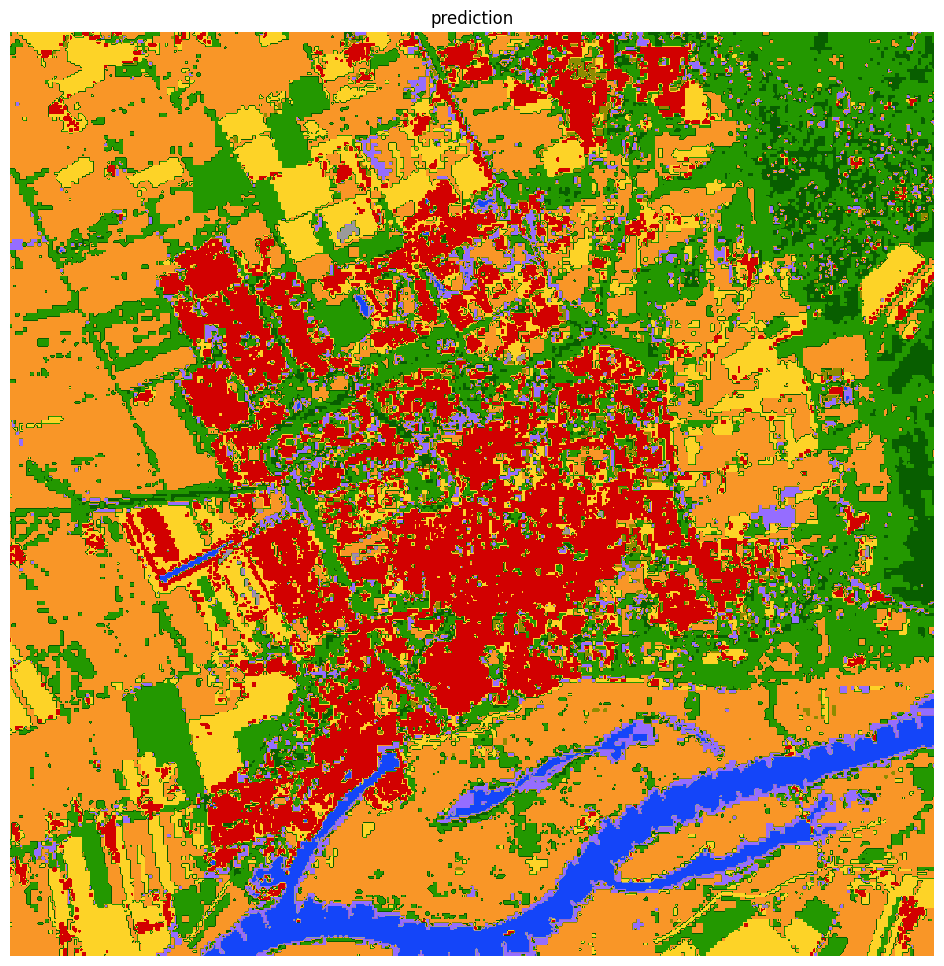

In [ ]:
########################################### Wageningen  ##################################################################
with rasterio.open("s2_wur.tif") as src:
    s2_wur = src.read()

wur_red = s2_wur[4]
wur_NIR = s2_wur[7]

# Avoiding zero division errors by setting numpy warnings to ignore
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
wur_ndvi =  (wur_NIR - wur_red) / (wur_NIR + wur_red)

# Reshape ndvi to match the dimensions of s2_arn
wur_ndvi_reshaped = np.expand_dims(wur_ndvi, axis=0)

s2_wur = np.concatenate((s2_wur, wur_ndvi_reshaped))


C, H, W = s2_wur.shape
X_wur = s2_wur.reshape(C, H * W).T
# y_wur = lc_wur.reshape(H * W)

y_pred_wur = clf.predict(X_wur)
y_pred_wur = y_pred_wur.reshape(H, W)

y_pred = clf.predict(X_wur)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(y_pred_wur, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("prediction")

In [ ]:
# Version 2.1 Trying to find best amount trees

# try again to find the best amount of trees
# runtime = 15 min
# result = 8

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# pars = [{[ 5, 10, 50, 100, 150, 200]}]


# Initialize GridSearchCV
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
# grid_search.fit(X, y)

# Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best parameters:", best_params)
# print("Best score:", best_score)

In [ ]:
submission_df = pd.DataFrame([y_pred_wur.reshape(-1)], index=["Predicted"]).T
submission_df.index.name = 'ID'
submission_df.to_csv("submission.csv")
print("writing submission")

writing submission


**--------------------Comments for next steps ----------------**

adapt the top code so that train is arnhem and test is renkum

**-------------------------------TRY CNN------------------------------------**

In [ ]:
# # Version 3.0 Trying to implement a CNN with the help Internet
# But did not mananage to make it run
!pip install numpy tensorflow keras matplotlib scikit-learn

In [ ]:
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Load the data
with rasterio.open("s2_arn.tif") as src:
    arn_satellite_images = src.read()

with rasterio.open("lc_arn.tif") as src:
   arn_land_cover_labels = src.read()

with rasterio.open("s2_ren.tif") as src:
    ren_satellite_images = src.read()

with rasterio.open("lc_ren.tif") as src:
   ren_land_cover_labels = src.read()

# Normalize pixel values to be between 0 and 1
arn_satellite_images, arn_land_cover_labels = arn_satellite_images / 255.0, arn_land_cover_labels
ren_satellite_images, ren_land_cover_labels = ren_satellite_images / 255.0, ren_land_cover_labels

# Split the data into train and test datasets
train_images = arn_satellite_images
test_images = ren_satellite_images
train_labels = arn_land_cover_labels
test_labels = ren_land_cover_labels



In [ ]:
# Assuming satellite_images and land_cover_labels are lists
# train_images, test_images, train_labels, test_labels = train_test_split(arn_satellite_images, arn_land_cover_labels, test_size=0.2)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 13)), # 13 spectral bands
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10) # 10 different classes in the EuroSAT dataset
])

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
# history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

In [ ]:
arn_land_cover_labels.shape

(1, 500, 500)

In [ ]:
# test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
# print('\nTest accuracy:', test_acc)

In [ ]:
#plt.figure(figsize=(12, 4))

#plt.subplot(1, 2, 1)
#plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#plt.legend()
#plt.title('Training and Validation Accuracy')

#plt.subplot(1, 2, 2)
#plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
#plt.legend()
#plt.title('Training and Validation Loss')

#plt.show()

**---------------- Test with ChatGPT Code ------------------------------**

In [ ]:
# # Version 3.1 Trying to implement a CNN with the help of ChatGPT
# But did not mananage to make it run

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Define the CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

train_images = arn_satellite_images
test_images = ren_satellite_images
train_labels = arn_land_cover_labels
test_labels = ren_land_cover_labels

# Reshape the data to match CNN input shape
train_images = train_images.reshape(-1, 500, 500, 12)
test_images = test_images.reshape(-1, 500, 500, 12)

# Create the CNN model
model = create_model((500, 500, 12), 10)  # Assuming 10 land cover classes

# Train the model
#history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


**-------------------New Try Random Forst with training Arnhem and Test Renkum -----------------**

In [ ]:
# # Version 4.0 Implementing Random Forest classification

# We use the previous approaches and also caculate the NDVI and add it to the model and we also dont split anrhem into training and test data anymore

import numpy as np

# first we reload the files

########################################### Arnhem  ##################################################################
with rasterio.open("s2_arn.tif") as src:
    s2_arn = src.read()

arn_red = s2_arn[4]
arn_NIR = s2_arn[7]

# Avoiding zero division errors by setting numpy warnings to ignore
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
arn_ndvi =  (arn_NIR - arn_red) / (arn_NIR + arn_red)

# Reshape ndvi to match the dimensions of s2_arn
arn_ndvi_reshaped = np.expand_dims(arn_ndvi, axis=0)

s2_arn = np.concatenate((s2_arn, arn_ndvi_reshaped))

with rasterio.open("lc_arn.tif") as src:
    lc_arn = src.read(1)
########################################### Renkum  ##################################################################
with rasterio.open("s2_ren.tif") as src:
    s2_ren = src.read()

ren_red = s2_ren[4]
ren_NIR = s2_ren[7]

# Avoiding zero division errors by setting numpy warnings to ignore
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ren_ndvi =  (ren_NIR - ren_red) / (ren_NIR + ren_red)

# Reshape ndvi to match the dimensions of s2_ren
ren_ndvi_reshaped = np.expand_dims(ren_ndvi, axis=0)


s2_ren = np.concatenate((s2_ren, ren_ndvi_reshaped))

with rasterio.open("lc_ren.tif") as src:
    lc_ren = src.read(1)
############################################################################################################
# now apply the model

# reshape the image C x 500 x 500 to a vector C x 250000
C, H, W = s2_arn.shape
X_train = s2_arn.reshape(C, H * W).T

# reshape the ground truth 500 x 500 to a vector 1 x 250000
y_train = lc_arn.reshape(-1,1)

# reshape the image C x 500 x 500 to a vector C x 250000
C, H, W = s2_ren.shape
X_test = s2_ren.reshape(C, H * W).T

# reshape the ground truth 500 x 500 to a vector 1 x 250000
y_test = lc_ren.reshape(-1,1)


from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

#### from Random Forest exercise

# TODO import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_features=6, max_depth = 15)

# TODO execute the exhaustive search by calling fit
rf2 = rf.fit(X_train, y_train)

#Predict the response y_pred for test dataset X_test with .predict()
y_pred_ren = rf2.predict(X_test)

# Calculate performance metrics
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("R^2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred, squared=False))


<ipython-input-35-891acabe70b8>:80: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = rf.fit(X_train, y_train)


MAPE 1554678620165344.5
R^2 -1.0093336109358275
MAE 106.61584
RMSE 3.1254478079148913


Jaccard score: 0.49


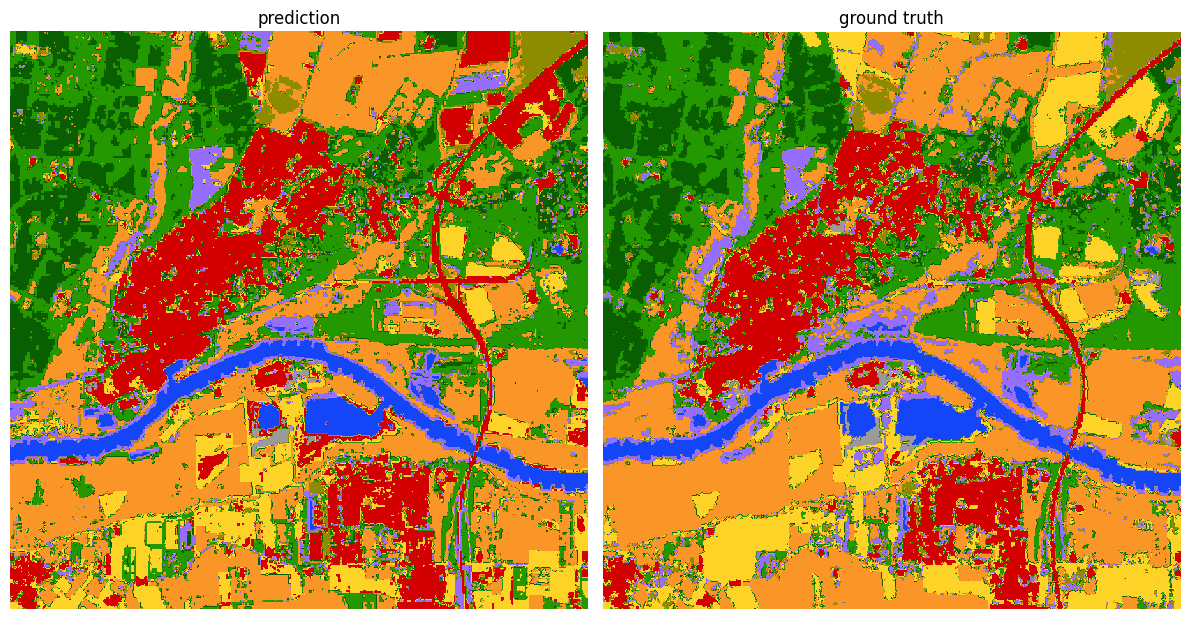

In [ ]:
y_pred_ren = y_pred_ren.reshape(H, W) # reshape labels back from vector to an image

fig, axs = plt.subplots(1,2, figsize=(12,12))
#ax = axs[0]
#ax.imshow(s2_ren.transpose(1,2,0) / 2000)
#ax.axis("off")
#ax.set_title("Input: Sentinel-2")

ax = axs[0]
ax.imshow(y_pred_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("prediction")

ax = axs[1]
ax.imshow(lc_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("ground truth")
plt.tight_layout()

# class-wise IoU (same Jaccard Score)
score = jaccard_score(lc_ren.reshape(-1), y_pred_ren.reshape(-1), average="macro", labels=labels)

print(f"Jaccard score: {score:.2f}")

Text(0.5, 1.0, 'prediction')

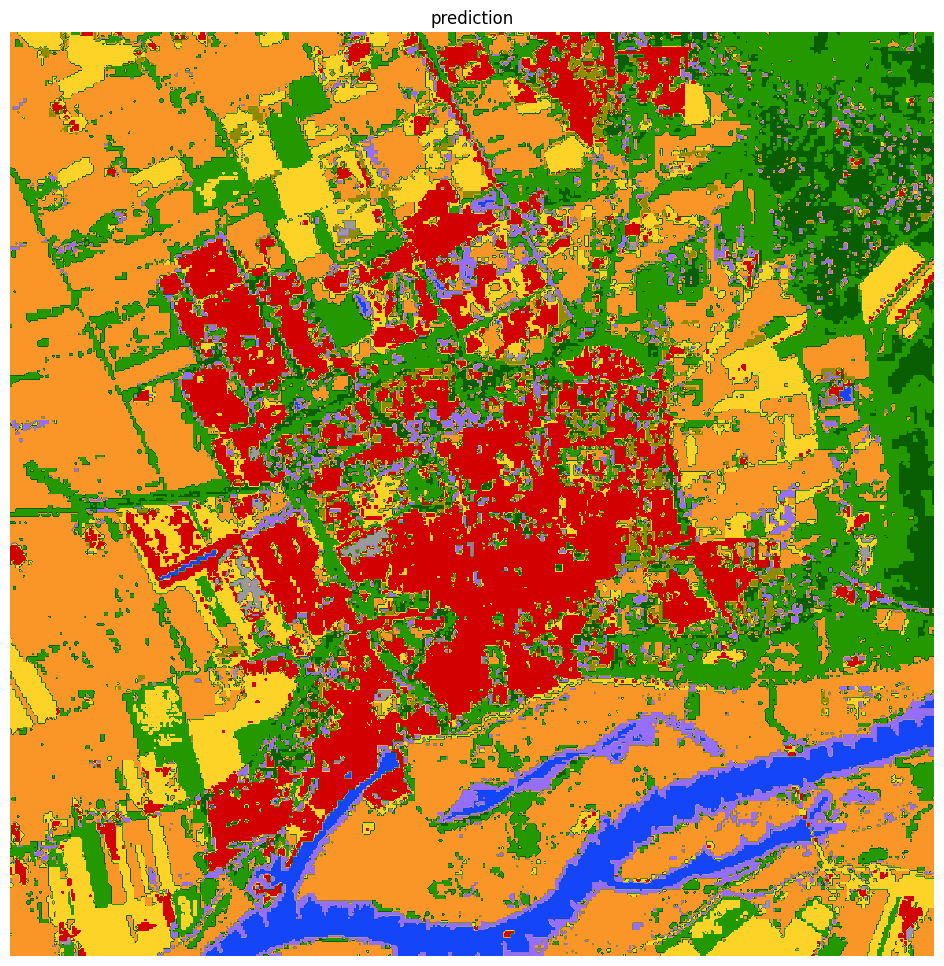

In [ ]:
########################################### Wageningen  ##################################################################
with rasterio.open("s2_wur.tif") as src:
    s2_wur = src.read()

wur_red = s2_wur[4]
wur_NIR = s2_wur[7]

# Avoiding zero division errors by setting numpy warnings to ignore
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
wur_ndvi =  (wur_NIR - wur_red) / (wur_NIR + wur_red)

# Reshape ndvi to match the dimensions of s2_arn
wur_ndvi_reshaped = np.expand_dims(wur_ndvi, axis=0)

s2_wur = np.concatenate((s2_wur, wur_ndvi_reshaped))


C, H, W = s2_wur.shape
X_wur = s2_wur.reshape(C, H * W).T
# y_wur = lc_wur.reshape(H * W)

y_pred_wur = rf.predict(X_wur)
y_pred_wur = y_pred_wur.reshape(H, W)

y_pred = rf.predict(X_wur)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(y_pred_wur, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("prediction")

In [ ]:
submission_df = pd.DataFrame([y_pred_wur.reshape(-1)], index=["Predicted"]).T
submission_df.index.name = 'ID'
submission_df.to_csv("submission4.csv")
print("writing submission")

writing submission


Node:
Max_depth = 15
max_feature = 6
(Max_trees = 50) n_estimators

**------ Try to improve the result by smoothing the result ---------------**

In [ ]:
# Version 5.0 Trying to improve the result through post classification processing:  we used gaussian smoothing

import cv2

# Apply Gaussian smoothing
smoothed_image = cv2.GaussianBlur(y_pred_wur, (1, 1), 2)

Text(0.5, 1.0, 'prediction')

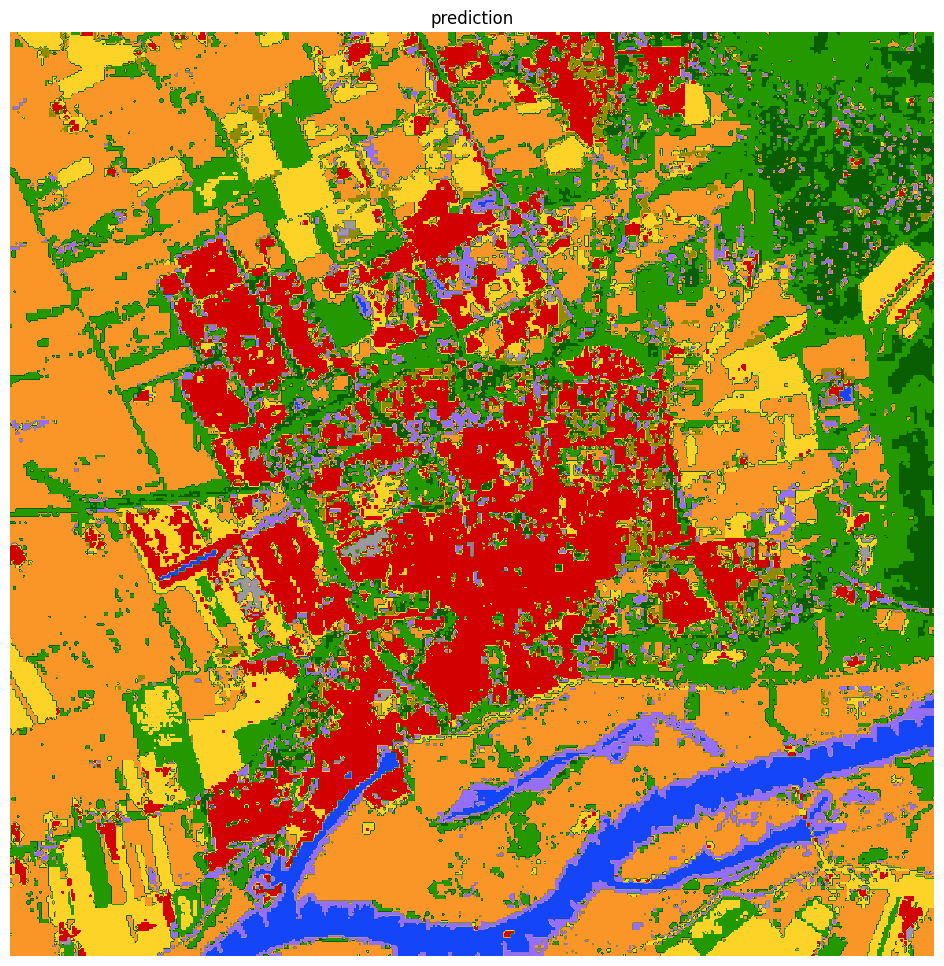

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(smoothed_image, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("prediction")

In [ ]:
submission_df = pd.DataFrame([smoothed_image.reshape(-1)], index=["Predicted"]).T
submission_df.index.name = 'ID'
submission_df.to_csv("submission5.csv")
print("writing submission")

writing submission


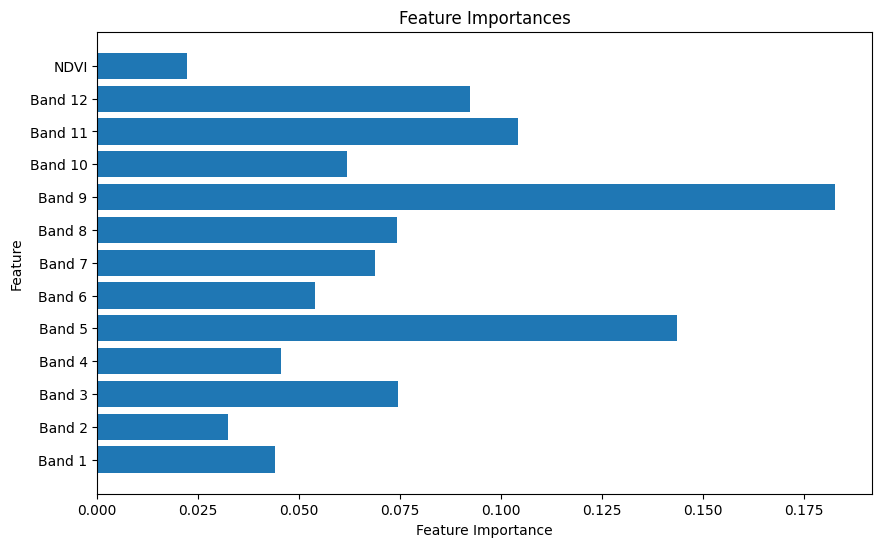

In [ ]:
## Version 6: Implementing feature importance to improve the classification result of the previous random forest classifier

# Trying to implement feature importance

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'features' is your feature matrix (sentinel 2 images) and 'labels' are your target labels
# 'features' should have shape (n_samples, n_features), where n_samples is the number of samples and n_features is the number of features (12 bands + NDVI)

# Retrieve feature importances
importances = rf.feature_importances_

# Visualize feature importances
n_features = X_train.shape[1]

plt.figure(figsize=(10, 6))
plt.barh(range(n_features), importances, align='center')
plt.yticks(np.arange(n_features), ['Band {}'.format(i) for i in range(1, n_features)] + ['NDVI'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
# Trying to implement the feature importance into the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


# Select features based on importance scores
threshold = 0.05
selected_features = np.where(importances > threshold)[0]
selected_feature_names = ['Band {}'.format(i) for i in selected_features] + ['NDVI']

# Subset the data to include only important features
selected_features_data = X_train[:, selected_features]

# Re-train the model using the subset of data containing only important features
rf.fit(selected_features_data, y_train)

<ipython-input-43-c056f4117f6a>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(selected_features_data, y_train)


RandomForestClassifier(max_depth=15, max_features=6, n_estimators=50)

In [ ]:
#Predict the response y_pred for test dataset X_test with .predict()
selected_features_test = X_test[:, selected_features]
y_pred_ren = rf.predict(selected_features_test)
y_pred_ren = y_pred_ren.reshape(H, W)

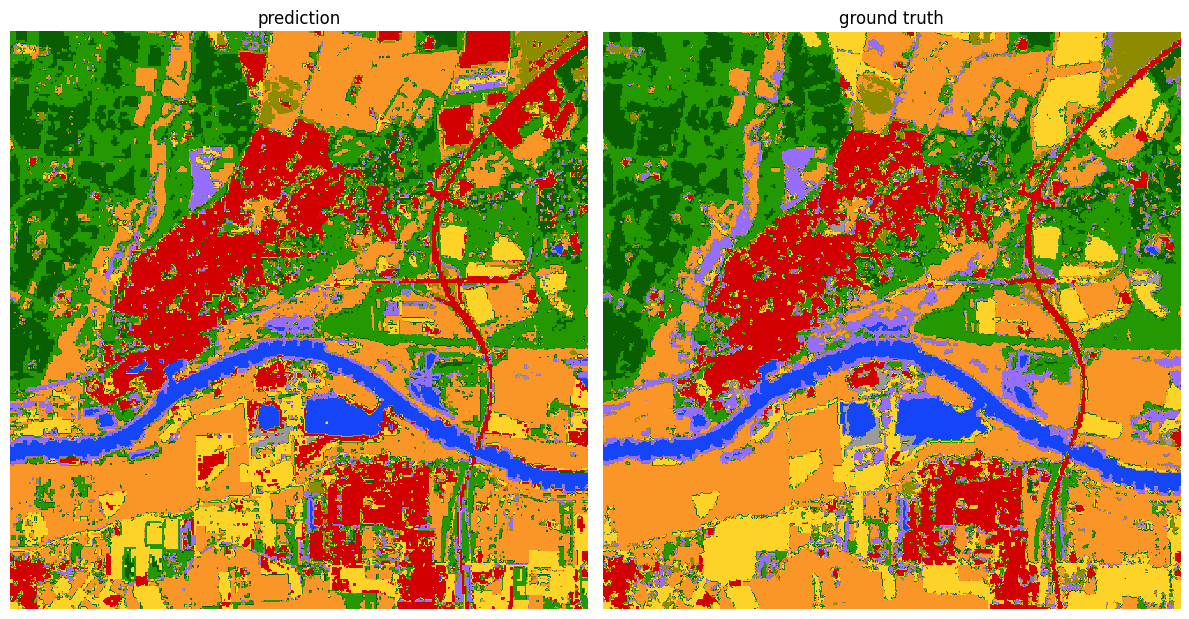

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,12))
#ax = axs[0]
#ax.imshow(s2_ren.transpose(1,2,0) / 2000)
#ax.axis("off")
#ax.set_title("Input: Sentinel-2")

ax = axs[0]
ax.imshow(y_pred_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("prediction")

ax = axs[1]
ax.imshow(lc_ren, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("ground truth")
plt.tight_layout()

In [ ]:
with rasterio.open("s2_wur.tif") as src:
    s2_wur = src.read()

wur_red = s2_wur[4]
wur_NIR = s2_wur[7]

# Avoiding zero division errors by setting numpy warnings to ignore
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
wur_ndvi =  (wur_NIR - wur_red) / (wur_NIR + wur_red)

# Reshape ndvi to match the dimensions of s2_arn
wur_ndvi_reshaped = np.expand_dims(wur_ndvi, axis=0)

s2_wur = np.concatenate((s2_wur, wur_ndvi_reshaped))


C, H, W = s2_wur.shape
X_wur = s2_wur.reshape(C, H * W).T
#y_wur = lc_wur.reshape(H * W)


In [ ]:
# Select features based on importance scores
threshold = 0.05
selected_features = np.where(importances > threshold)[0]
selected_feature_names = ['Band {}'.format(i) for i in selected_features] + ['NDVI']

# Subset the data to include only important features
selected_features_data = X_wur[:, selected_features]


y_pred_wur = rf.predict(selected_features_data)
y_pred_wur = y_pred_wur.reshape(H, W)

y_pred = rf.predict(selected_features_data)

Text(0.5, 1.0, 'prediction')

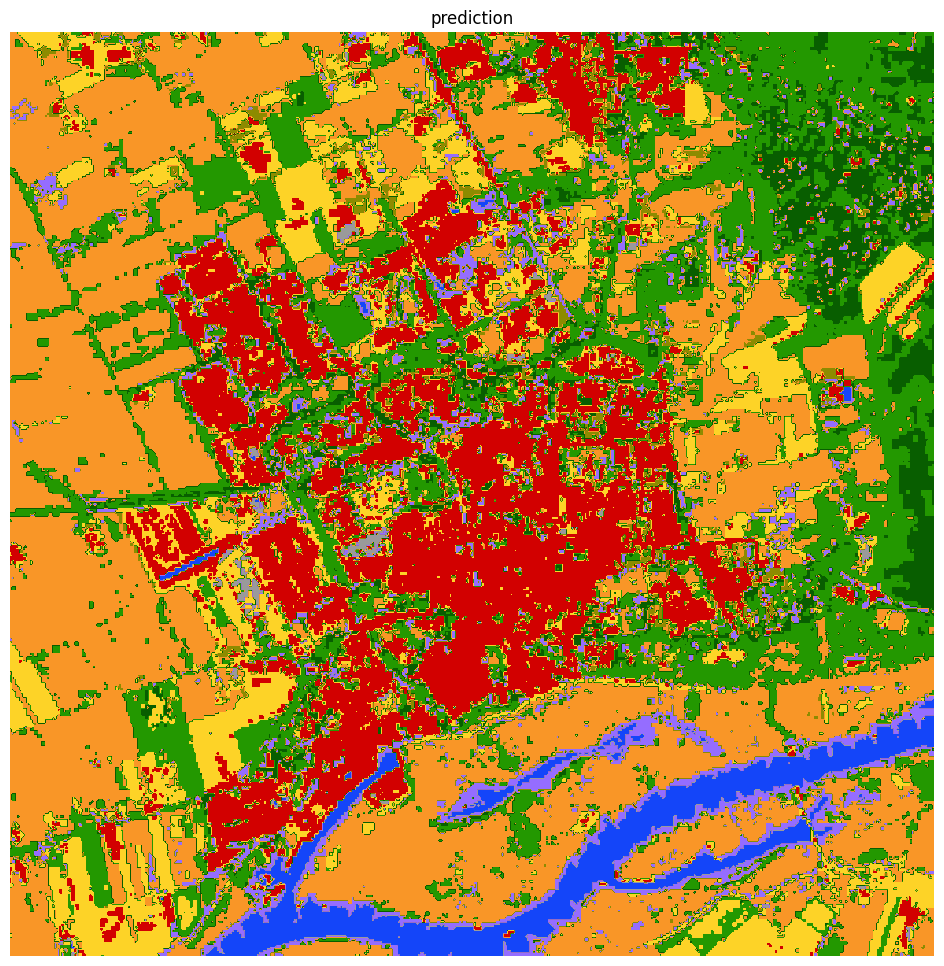

In [ ]:
selected_features_wur = X_wur[:, selected_features]
y_pred_wur = rf.predict(selected_features_data)

y_pred_wur = y_pred_wur.reshape(H, W)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(y_pred_wur, cmap=s2glc_cmap)
ax.axis("off")
ax.set_title("prediction")

In [ ]:
submission_df = pd.DataFrame([y_pred_wur.reshape(-1)], index=["Predicted"]).T
submission_df.index.name = 'ID'
submission_df.to_csv("submission6.csv")
print("writing submission")

writing submission
